In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Data/all_call_stages.csv')
print(data.head())

/tmp/ipykernel_23824/1939787018.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/all_call_stages.csv')


   id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila        municipality ward mauza village location comments  \
0             NaN                 NaN  NaN   NaN     NaN      NaN      NaN   
1   Sherpur Sadar  Sherpur Pourasabha  NaN   NaN     NaN      NaN      NaN   
2           Titas                 NaN  NaN   NaN     NaN      NaN      NaN   
3  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   
4  Faridpur Sadar                 NaN  NaN   NaN     NaN      NaN      NaN   

                                pcqc                scqc  \
0  No Response and Disconnected Call  Mute Or Blank Call   
1  No Response

In [2]:
# Display basic information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833671 entries, 0 to 1833670
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   gender                 object 
 2   physically_challenged  object 
 3   division               object 
 4   district               object 
 5   city                   object 
 6   upazila                object 
 7   municipality           object 
 8   ward                   object 
 9   mauza                  object 
 10  village                object 
 11  location               object 
 12  comments               object 
 13  pcqc                   object 
 14  scqc                   object 
 15  call_type              object 
 16  answered_at            object 
 17  call_duration_min      float64
 18  event_date             object 
dtypes: float64(1), int64(1), object(17)
memory usage: 265.8+ MB
None


In [3]:
data.shape

(1833671, 19)

### Data Clean

In [4]:
data = data.drop(['municipality','ward','mauza','village','location','comments'], axis=1)

In [5]:
print(data.head())

   id  gender physically_challenged    division  district city  \
0   1     NaN                    No         NaN       NaN  NaN   
1   2    Male                   Yes  Mymensingh   Sherpur  NaN   
2   3    Male                    No  Chittagong   Comilla  NaN   
3   4  Female                    No       Dhaka  Faridpur  NaN   
4   5  Female                    No       Dhaka  Faridpur  NaN   

          upazila                               pcqc                scqc  \
0             NaN  No Response and Disconnected Call  Mute Or Blank Call   
1   Sherpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
2           Titas  No Response and Disconnected Call  Mute Or Blank Call   
3  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
4  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   

                           call_type          answered_at  call_duration_min  \
0  No Response and Disconnected Call  2023-12-31 23:56:50         

In [6]:
data.dropna(subset=['gender'], inplace=True) 

In [7]:
data.shape

(1218223, 13)

In [8]:
print(data.head())

   id  gender physically_challenged    division      district city  \
1   2    Male                   Yes  Mymensingh       Sherpur  NaN   
2   3    Male                    No  Chittagong       Comilla  NaN   
3   4  Female                    No       Dhaka      Faridpur  NaN   
4   5  Female                    No       Dhaka      Faridpur  NaN   
6   7    Male                    No  Chittagong  Khagrachhari  NaN   

          upazila                               pcqc                scqc  \
1   Sherpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
2           Titas  No Response and Disconnected Call  Mute Or Blank Call   
3  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
4  Faridpur Sadar  No Response and Disconnected Call  Mute Or Blank Call   
6       Matiranga  No Response and Disconnected Call  Mute Or Blank Call   

                           call_type          answered_at  call_duration_min  \
1  No Response and Disconnected Call  2023

In [9]:
# import pandas as pd
# import math

# # Number of rows per file 
# rows_per_file = 610000

# # Calculate the number of files needed
# num_files = math.ceil(len(data) / rows_per_file)

# # Split and save the DataFrame
# for i in range(num_files):
#     start_idx = i * rows_per_file
#     end_idx = min((i + 1) * rows_per_file, len(data))
    
#     # Get the chunk of data
#     chunk = data.iloc[start_idx:end_idx]
    
#     # Create the filename with index
#     filename = f'call_stages_part_{i+1}.csv'
    
#     # Save to CSV
#     chunk.to_csv(filename, index=False)
#     print(f'Saved {filename} with {len(chunk)} rows')

# print(f'\nTotal files created: {num_files}')

### Call Type By District

In [10]:
caller_type_district = data.groupby(['district', 'call_type']).size().unstack(fill_value=0)
caller_type_district

call_type,Application Assistance,Complain,Complaint Customer Experience,Complaints,Emergency Assistance,Helpline,Incomplete_Complaints,Ministry of Disaster Management and Relief(modmr),No Response and Disconnected Call,Prank Call,Queries,Query
district,,,,,,,,,,,,
Bagerhat,0,3,0,111,4,346,37,0,2196,231,4816,0
Bandarban,1,0,0,13,1,87,13,0,660,61,1168,0
Barguna,1,3,0,82,2,229,25,1,1583,97,3085,0
Barisal,2,0,0,189,6,639,80,0,4616,453,9408,1
Bhola,0,4,0,114,16,485,63,0,3651,225,6659,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Sirajganj,1,0,0,308,12,542,60,0,7558,229,11763,2
Sunamganj,1,0,0,253,3,437,78,0,3241,168,5199,0
Sylhet,0,0,0,2668,6,1241,321,0,9387,605,16792,2


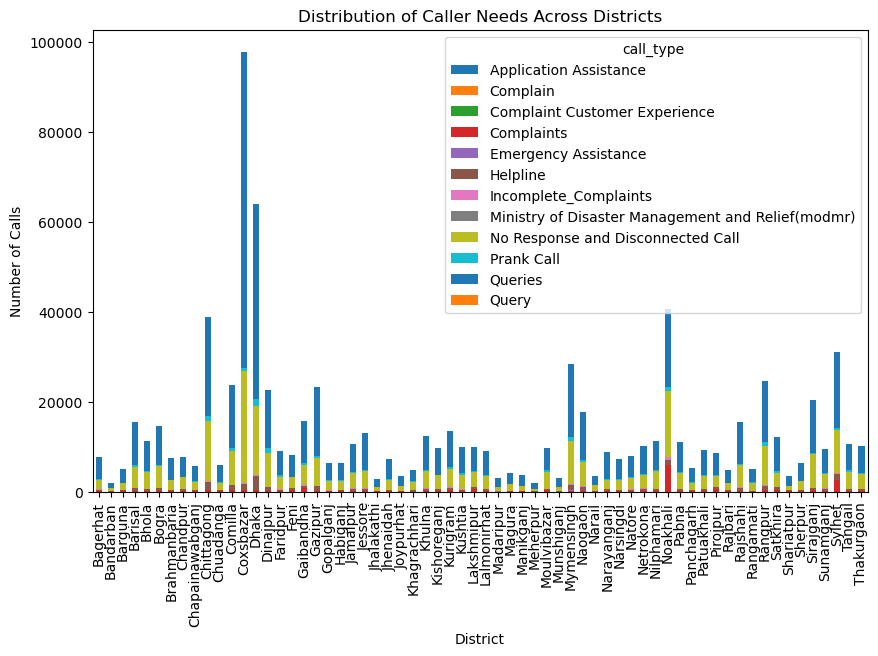

In [11]:
caller_type_district.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Caller Needs Across Districts")
plt.xlabel("District")
plt.ylabel("Number of Calls")
plt.show()

### Analysis of Unrelated Calls

In [32]:
# Count the number of occurrences for three conditions
query_not_related_count = data[data['pcqc'].isin(["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"])].shape[0]

# Print the result
print("Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call':", query_not_related_count)

Count of 'Query Not Related To 333 Service', 'No Response and Disconnected Call' and 'Prank Call': 687453


In [33]:
# Percentage of "Query Not Related To 333 Service"
total_queries = data.shape[0]
percentage_not_related = (query_not_related_count / total_queries) * 100
print(f"Percentage of 'Query Not Related To 333 Service': {percentage_not_related:.2f}%")

Percentage of 'Query Not Related To 333 Service': 56.43%


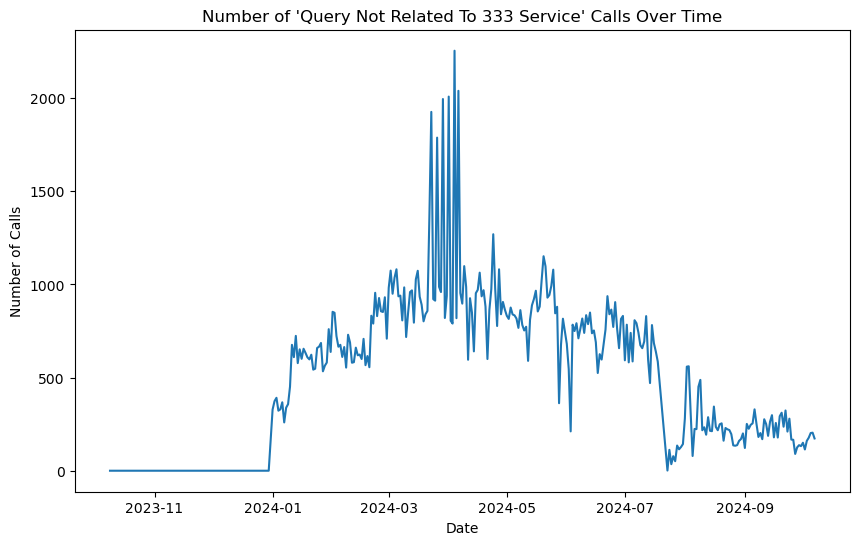

In [34]:
# Filter rows where 'pcqc' is "Query Not Related To 333 Service"
not_related_df = data[data['pcqc'] == "Query Not Related To 333 Service"]

# Group by 'created_at' and count occurrences
calls_over_time = not_related_df.groupby(not_related_df['created_at'].dt.date).size()

# Plotting using the specified format
calls_over_time.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.title("Number of 'Query Not Related To 333 Service' Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")

# Show plot
plt.show()

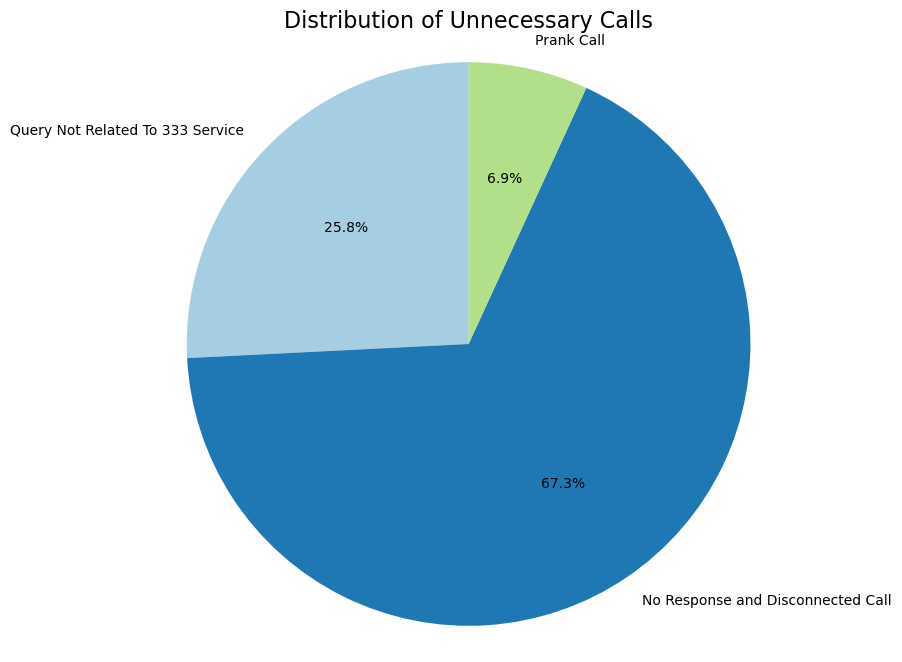

In [35]:
# Count the number of each type of unnecessary call
counts = data['pcqc'].value_counts().reindex(
    ["Query Not Related To 333 Service", "No Response and Disconnected Call", "Prank Call"],
    fill_value=0
)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Unnecessary Calls', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


### Gender Based Analysis

In [15]:
# Count the number of males and females
gender_count = data['gender'].value_counts()
print(gender_count)
# Calculate percentage
gender_percentage = (gender_count / gender_count.sum()) * 100
print(gender_percentage)

gender
Male      985106
Female    233117
Name: count, dtype: int64
gender
Male      80.864177
Female    19.135823
Name: count, dtype: float64


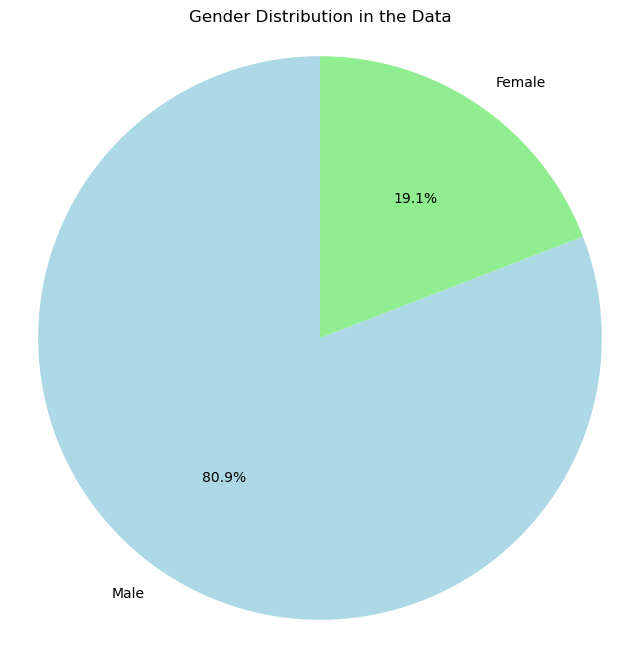

In [16]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution in the Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

### Trends in the number of calls over time

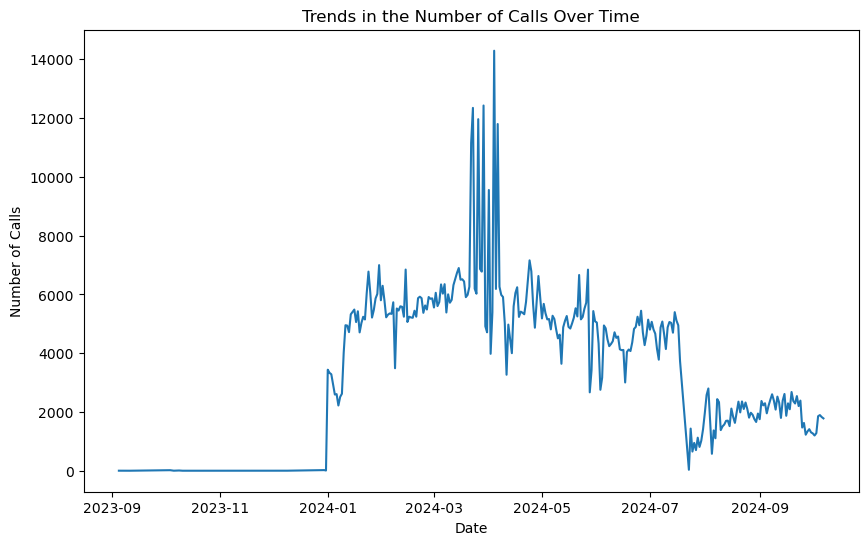

In [17]:
# Group by the date part of 'answered_at' and count the number of calls
data['answered_at'] = pd.to_datetime(data['answered_at'], errors='coerce') 
calls_over_time = data.groupby(data['answered_at'].dt.date).size()

# Plotting the line chart
calls_over_time.plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.title("Trends in the Number of Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Calls")

# Display the plot
plt.show()

### Analysis of Call Types

In [18]:
# Count the number of occurrences of each call type
call_type_count = data['call_type'].value_counts()
print(call_type_count)
print("--------------------------------------------------------------")
# Calculate the percentage of each call type
call_type_percentage = (call_type_count / call_type_count.sum()) * 100
print("Percentage of call types")
print(call_type_percentage)

call_type
Queries                                              650431
No Response and Disconnected Call                    462959
Helpline                                              44580
Prank Call                                            34784
Complaints                                            19382
Incomplete_Complaints                                  5423
Emergency Assistance                                    271
Complain                                                220
Application Assistance                                   88
Query                                                    71
Complaint Customer Experience                            12
Ministry of Disaster Management and Relief(modmr)         2
Name: count, dtype: int64
--------------------------------------------------------------
Percentage of call types
call_type
Queries                                              53.391785
No Response and Disconnected Call                    38.002812
Helpline            

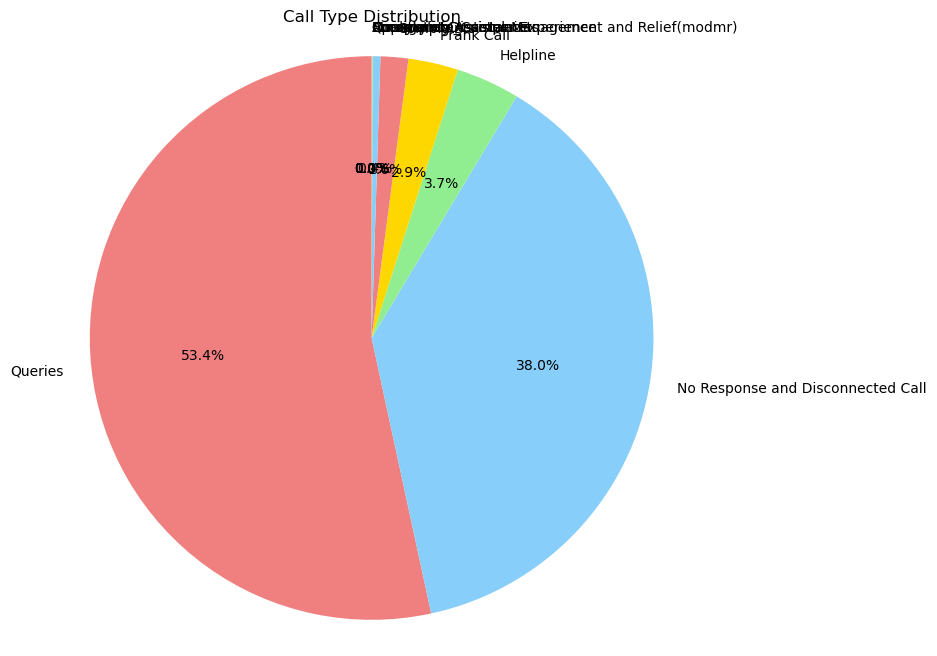

In [19]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(call_type_percentage, labels=call_type_percentage.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.title('Call Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

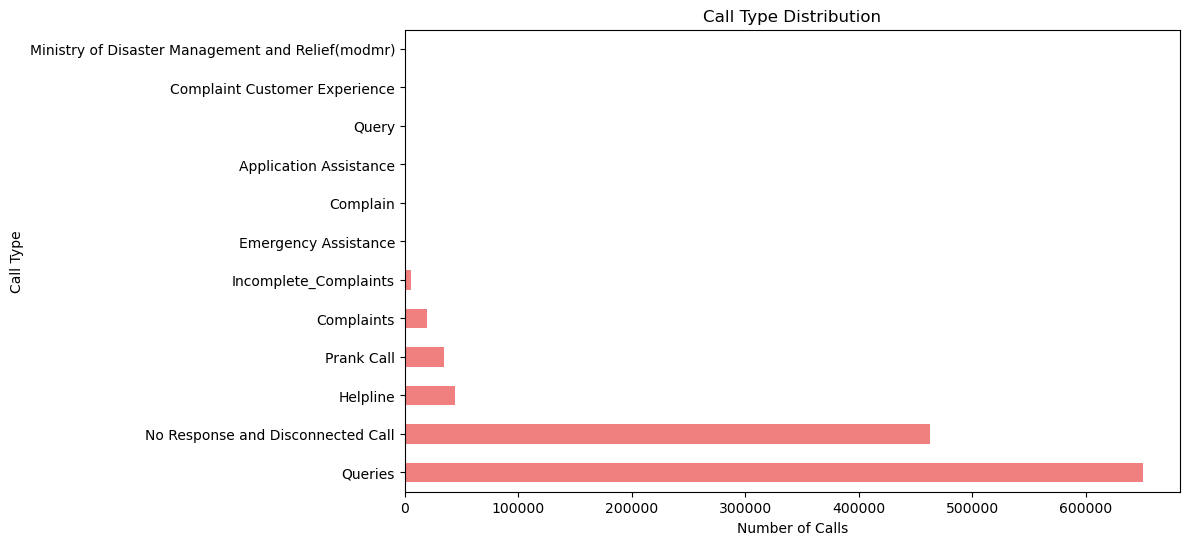

In [20]:
call_type_count.plot(kind='barh', figsize=(10, 6), color='lightcoral')
plt.title('Call Type Distribution')
plt.xlabel('Number of Calls')
plt.ylabel('Call Type')
plt.show()


### Number of Calls based on time segment

time_segment
Afternoon (5 PM - 9 PM)      295963
Late Night (12 AM - 5 AM)     33228
Morning (5 AM - 12 PM)       333663
Night (9 PM - 12 AM)         145291
Noon (12 PM - 5 PM)          410078
Name: count, dtype: int64


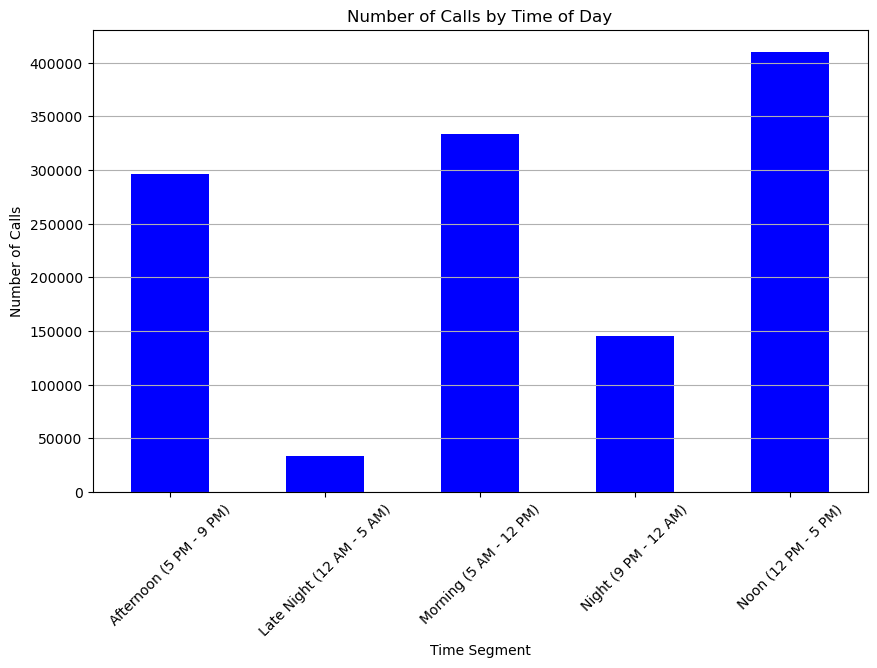

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'answered_at' to datetime
data['answered_at'] = pd.to_datetime(data['answered_at'], errors='coerce')

# Extract the hour from the 'answered_at' column
data['hour'] = data['answered_at'].dt.hour

# Define time segments
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning (5 AM - 12 PM)'
    elif 12 <= hour < 17:
        return 'Noon (12 PM - 5 PM)'
    elif 17 <= hour < 21:
        return 'Afternoon (5 PM - 9 PM)'
    elif 21 <= hour < 24:
        return 'Night (9 PM - 12 AM)'
    else:
        return 'Late Night (12 AM - 5 AM)'

# Apply the categorization function
data['time_segment'] = data['hour'].apply(categorize_time)

# Count the number of calls in each time segment
calls_by_time_segment = data['time_segment'].value_counts().sort_index()
print(calls_by_time_segment) 
# Plotting the results
plt.figure(figsize=(10, 6))
calls_by_time_segment.plot(kind='bar', color='blue')
plt.title('Number of Calls by Time of Day')
plt.xlabel('Time Segment')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()